<a href="https://colab.research.google.com/github/denbush03/parser/blob/main/%D0%9F%D0%B0%D1%80%D1%81%D0%B5%D1%80_%D0%91%D1%83%D1%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Парсер сайта https://outmaxshop.ru/snickers 

---
Результатом мы получаем: Название товара, его цену со скидкой, скидку в процентах , цену без скидки и артикул товара


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir Результат

mkdir: cannot create directory ‘Результат’: File exists


In [ ]:
!cp data.csv

cp: missing destination file operand after 'data.csv'
Try 'cp --help' for more information.


In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import os

In [ ]:
!cp data.csv 


cp: missing destination file operand after 'data.csv'
Try 'cp --help' for more information.


In [ ]:
!touch /content/Результат/file1.csv

In [ ]:
HOST = 'https://outmaxshop.ru/'
URL =  'https://outmaxshop.ru/snickers/'

In [ ]:
CSV = '/content/Результат/file1.csv'

In [ ]:
HEADERS = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36 OPR/92.0.0.0'
}

In [ ]:
def get_html(url, params=''):
  r = requests.get(url, headers= HEADERS,params=params)
  return r

In [ ]:
def get_content(html):
  soup = BeautifulSoup(html, 'html.parser')
  items = soup.find_all('a', class_ ='catalog-product__item')
  clothes = []


  for item in items:
    clothes.append(
        {
            'name':item.find('div', class_ ='catalog-item__name catalog-item__name--catalog').get_text(strip =True),
            #'link':item.find('a', class_='data-layer-click').get_href(),
            'price_y_dis':item.find('div', class_ ='catalog-item__price catalog-item__price--catalog catalog-item__price--red').get_text(strip =True),
            'dis':item.find('div', class_ ='catalog-product__label').get_text(strip =True),
            'price_n_dis':item.find('div', class_ ='catalog-item__price catalog-item__price--catalog catalog-item__price--line').get_text(strip =True),
            'article':item.find('div', class_ ='catalog-item__articul catalog-item__articul--catalog catalog-item__articul--with-instock').get_text(strip =True),
            #'img': item.find('div', class_ ='catalog-item__img catalog-item__img--horizontal').get('href')
        }
    )
  return clothes

In [ ]:
def save_doc(items,path):
  with open(path,'w', newline='') as file:
    writer =csv.writer(file,delimiter=';')
    writer.writerow(['Название','Цена со скидкой', 'Скидка','Цена без скидки','Артикль'])
    for item in items:
      writer.writerow([item['name'],item['price_y_dis'], item['dis'],item['price_n_dis'],item['article']])


In [ ]:
def parser():
  PAGENATTION = 400
  #PAGENATTION = int(PAGENATTION.strip())
  html = get_html(URL)
  if html.status_code == 200:
    cards = []
    for page in range(1,PAGENATTION,40):
      print(f'Парсим страницу:{(round(page//40))+1}')
      html = get_html(URL, params = {'page': page})
      cards.extend(get_content(html.text))
      save_doc(cards,CSV)
    print(cards)
  else:
    print("САйт полёг!!!")
  


In [ ]:
html = get_html(URL)
print(get_content(html.text))
print(html)

[{'name': 'Ботинки Delta цвет черный', 'price_y_dis': '4 000₽', 'dis': '-30%', 'price_n_dis': '5 690₽', 'article': 'Артикул: 33244'}, {'name': 'Ботинки Delta цвет песочный', 'price_y_dis': '4 440₽', 'dis': '-30%', 'price_n_dis': '6 290₽', 'article': 'Артикул: 33243'}, {'name': 'Кроссовки Nike Air Jordan 1 Mid цвет разноцветный', 'price_y_dis': '4 440₽', 'dis': '-30%', 'price_n_dis': '6 290₽', 'article': 'Артикул: 33019'}, {'name': 'Зимние Сапоги Puma цвет черный', 'price_y_dis': '2 660₽', 'dis': '-30%', 'price_n_dis': '3 790₽', 'article': 'Артикул: 32907'}, {'name': 'Зимние Кроссовки Adidas Retropy E5 Hi цвет белый', 'price_y_dis': '2 220₽', 'dis': '-30%', 'price_n_dis': '3 190₽', 'article': 'Артикул: 32902'}, {'name': 'Зимние Кроссовки Nike Blazer Mid цвет белый', 'price_y_dis': '4 890₽', 'dis': '-30%', 'price_n_dis': '6 990₽', 'article': 'Артикул: 32893'}, {'name': 'Зимние Кроссовки Nike Blazer Mid цвет черный', 'price_y_dis': '4 890₽', 'dis': '-30%', 'price_n_dis': '6 990₽', 'articl

In [ ]:
parser()

Парсим страницу:1
Парсим страницу:2
Парсим страницу:3
Парсим страницу:4
Парсим страницу:5
Парсим страницу:6
Парсим страницу:7
Парсим страницу:8
Парсим страницу:9
Парсим страницу:10
[{'name': 'Ботинки Delta цвет черный', 'price_y_dis': '4 000₽', 'dis': '-30%', 'price_n_dis': '5 690₽', 'article': 'Артикул: 33244'}, {'name': 'Ботинки Delta цвет песочный', 'price_y_dis': '4 440₽', 'dis': '-30%', 'price_n_dis': '6 290₽', 'article': 'Артикул: 33243'}, {'name': 'Кроссовки Nike Air Jordan 1 Mid цвет разноцветный', 'price_y_dis': '4 440₽', 'dis': '-30%', 'price_n_dis': '6 290₽', 'article': 'Артикул: 33019'}, {'name': 'Зимние Сапоги Puma цвет черный', 'price_y_dis': '2 660₽', 'dis': '-30%', 'price_n_dis': '3 790₽', 'article': 'Артикул: 32907'}, {'name': 'Зимние Кроссовки Adidas Retropy E5 Hi цвет белый', 'price_y_dis': '2 220₽', 'dis': '-30%', 'price_n_dis': '3 190₽', 'article': 'Артикул: 32902'}, {'name': 'Зимние Кроссовки Nike Blazer Mid цвет белый', 'price_y_dis': '4 890₽', 'dis': '-30%', 'pr

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

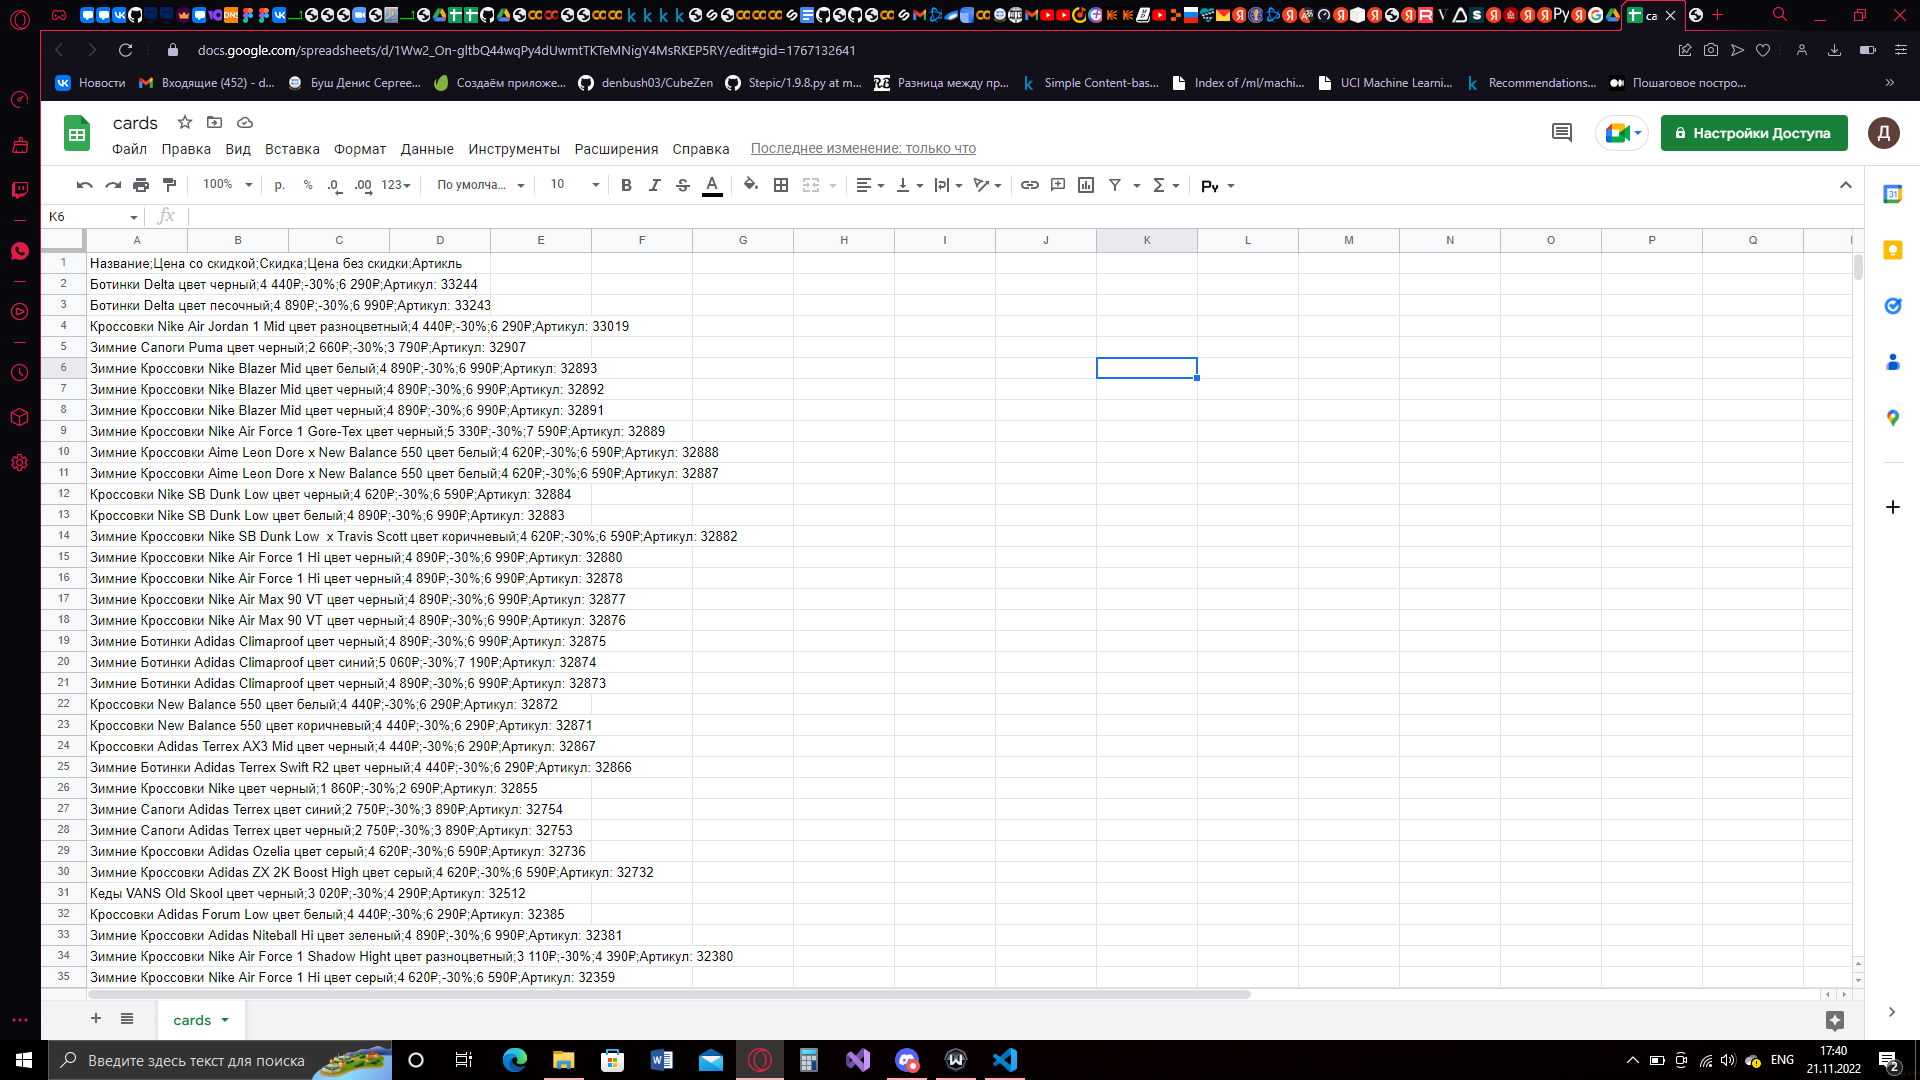